In [1]:
from src.data.movielens import MovieLensDataset, assign_users_into_usage_group, get_users_top_genre
import matplotlib.pyplot as plt

In [2]:
df = MovieLensDataset(download=True)._data

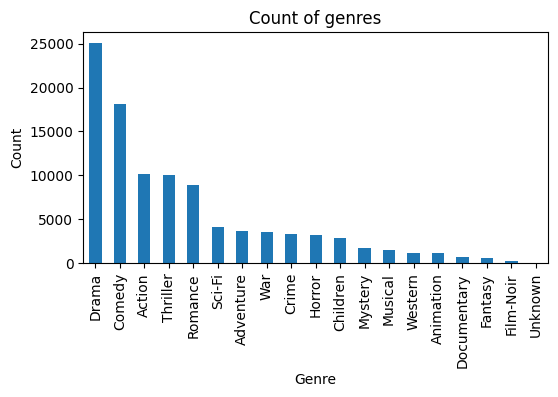

In [3]:
# plot count of genres
plt.figure(figsize=(6, 3), dpi=100)
df.groupby('genre').size().sort_values(ascending=False).plot(kind='bar')
plt.title('Count of genres')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.show()

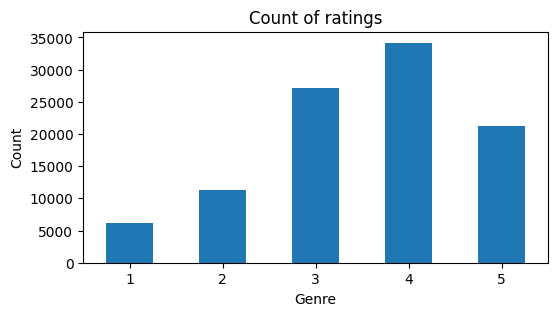

In [4]:
# plot count of ratings
plt.figure(figsize=(6, 3), dpi=100)
df.groupby('rating').size().plot(kind='bar')
plt.title('Count of ratings')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.xticks(rotation=0)
plt.show()

<Figure size 600x300 with 0 Axes>

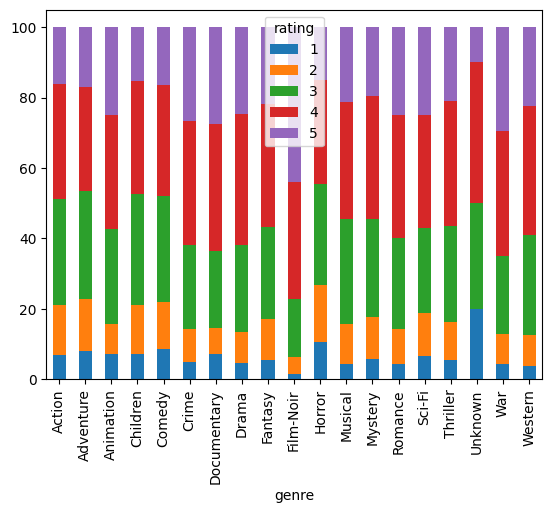

<Axes: xlabel='genre'>

<Figure size 600x300 with 0 Axes>

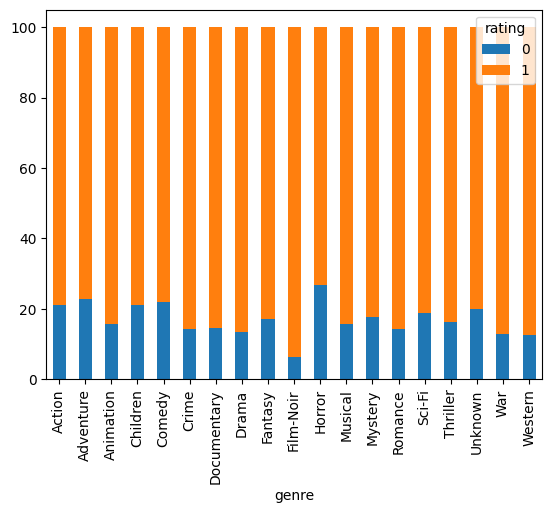

In [5]:
# plot count of percentage of ratings in each genre
plt.figure(figsize=(6, 3), dpi=100)
rating_share = df.groupby(['genre', 'rating']).size() / df.groupby('genre').size() * 100.0
rating_share.unstack().plot(kind='bar', stacked=True)
plt.show()

# plot count of percentage of ratings in each genre
plt.figure(figsize=(6, 3), dpi=100)
rating_share = df.copy()
rating_share['rating'] = rating_share['rating'].apply(lambda x: 1 if x >= 3 else 0)
rating_share = rating_share.groupby(['genre', 'rating']).size() / rating_share.groupby('genre').size() * 100.0
rating_share.unstack().plot(kind='bar', stacked=True)

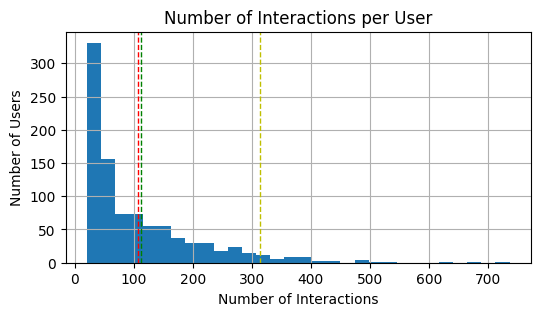

In [6]:
user_interactions = df.groupby("user_id").count()
interactions_count = user_interactions["item_id"]

mean = interactions_count.mean()
std = interactions_count.std()

higher_bound = mean * 2 + std
lower_bound = mean * 2 - std

plt.figure(figsize=(6, 3), dpi=100)
interactions_count.hist(bins=30)
plt.xlabel("Number of Interactions")
plt.ylabel("Number of Users")

plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)
plt.axvline(lower_bound, color='g', linestyle='dashed', linewidth=1)
plt.axvline(higher_bound, color='y', linestyle='dashed', linewidth=1)

plt.title("Number of Interactions per User")
plt.show()

In [7]:
higher_bound = mean + std

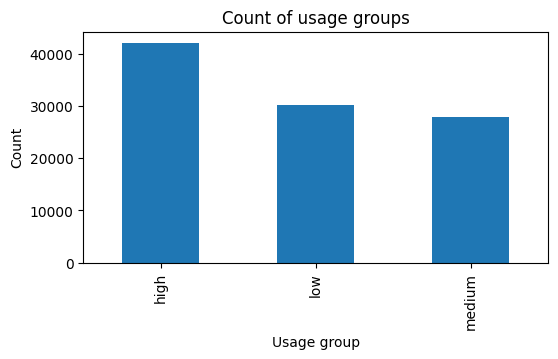

In [8]:
df = assign_users_into_usage_group(df, lower_bound, higher_bound)

# plot usage groups
plt.figure(figsize=(6, 3), dpi=100)
df.groupby('usage_group').size().sort_values(ascending=False).plot(kind='bar')
plt.title('Count of usage groups')
plt.ylabel('Count')
plt.xlabel('Usage group')

plt.show()

<Axes: xlabel='usage_group'>

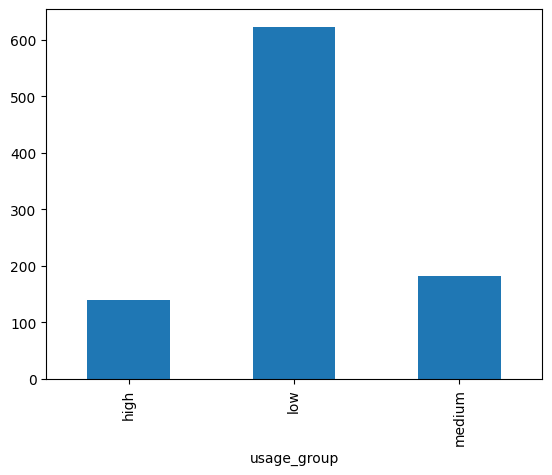

In [13]:
df.groupby('usage_group').user_id.nunique().plot(kind='bar')

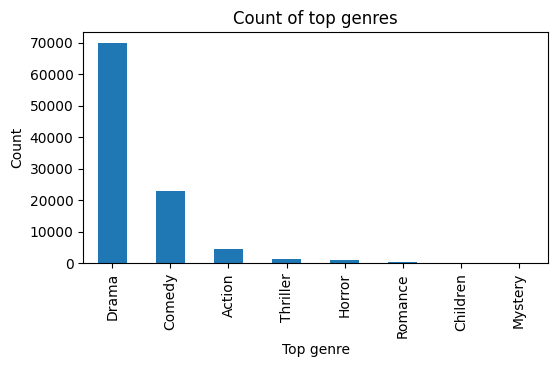

In [14]:
df = get_users_top_genre(df)

# plot top genres
plt.figure(figsize=(6, 3), dpi=100)
df.groupby('top_genre').size().sort_values(ascending=False).plot(kind='bar')
plt.title('Count of top genres')
plt.ylabel('Count')
plt.xlabel('Top genre')

plt.show()

<Axes: xlabel='top_genre'>

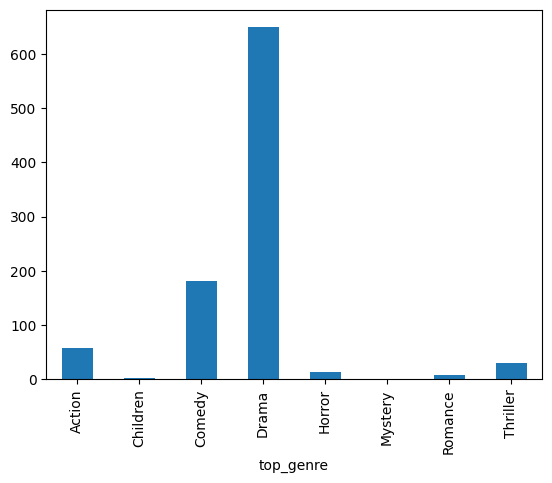

In [15]:
df.groupby('top_genre').user_id.nunique().plot(kind='bar')

<Figure size 600x300 with 0 Axes>

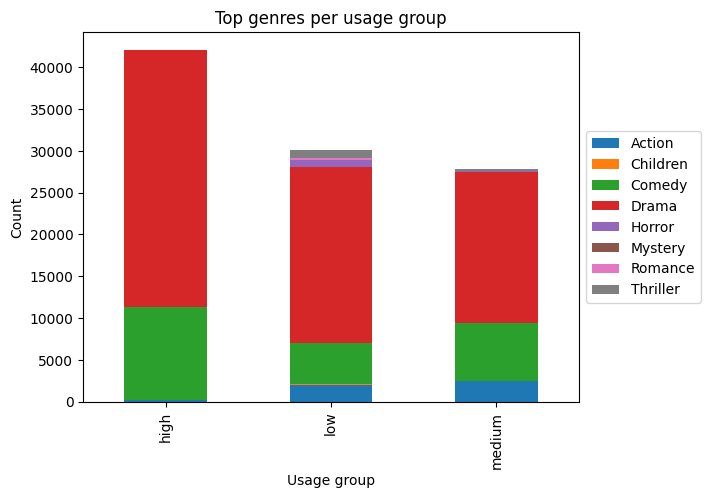

In [10]:
# top genres per usage group
plt.figure(figsize=(6, 3), dpi=100)
df.groupby(['usage_group', 'top_genre']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Top genres per usage group')
plt.ylabel('Count')
plt.xlabel('Usage group')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()